In [1]:
from sklearn.datasets import load_iris
iris = load_iris() #引入iris資料庫
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [2]:
import pandas as pd
df = pd.DataFrame(iris["data"],columns=iris['feature_names']) #將iris資料化為表格
df["target"] = iris["target"] #加上target直行
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


<AxesSubplot:>

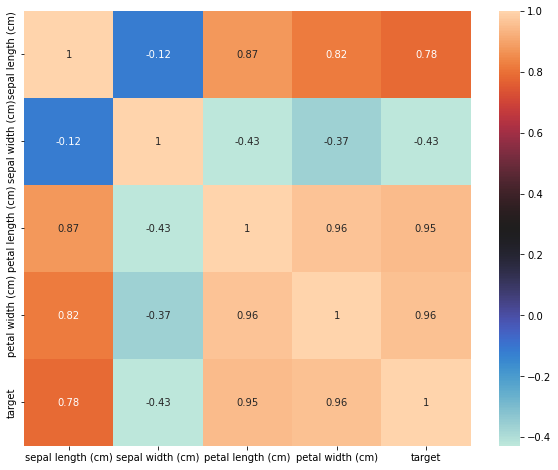

In [3]:
import matplotlib.pyplot as plt #畫圖函式庫
import seaborn as sns #熱點圖函式庫
%matplotlib inline
df.astype("float") #表格內數值轉浮點數
plt.figure(figsize = (10,8)) #調整資料顯示大小
sns.heatmap(df.corr(),cmap="icefire",annot = True) #將資料以熱點圖呈現

In [4]:
from sklearn.model_selection import train_test_split #訓練函式庫
#指定變數給訓練資料與測試資料
x_train,x_test,y_train,y_test = train_test_split(df.drop(["target"], axis = 1) , df["target"],test_size = 0.1) 


In [5]:
#n_cluster=K
#已知種類數量，直接指定K
from sklearn.cluster import KMeans #分群函式庫
clu = KMeans(n_clusters = 3)
clu.fit(x_train) #訓練模型


KMeans(n_clusters=3)

In [6]:
clu.labels_

array([1, 0, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 2,
       2, 1, 0, 0, 1, 1, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 2,
       0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 2, 2, 0,
       1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 1, 2, 0, 0,
       0, 2, 2])

In [7]:
pre = clu.predict(x_test) #建立預測結果
print(list(pre))
list(y_test)

[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 1, 2, 2]


[0, 0, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0, 2, 2]

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(pre,y_test) #算出預測精準度

0.2

In [9]:
from sklearn.metrics import silhouette_score
x = df.drop(["target"] , axis = 1)
plotx = []
ploty = []
for k in range(2,6):
    clu = KMeans(n_clusters = k)
    clu.fit(x)
    s = silhouette_score(x, clu.labels_)
    plotx.append(k)
    ploty.append(s)
print("K值:",plotx)
print("Score:", ploty)

K值: [2, 3, 4, 5]
Score: [0.6810461692117462, 0.5528190123564094, 0.49745518901737473, 0.4887488870931052]


Text(0, 0.5, 'Score')

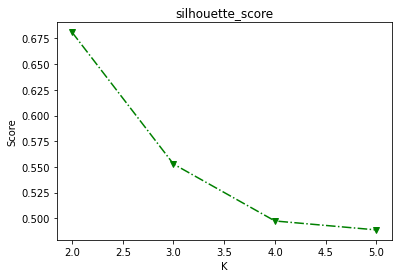

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(plotx,ploty,"gv-.") #x軸、Y軸、顏色/點/線
plt.title("silhouette_score") #增加標題
plt.xlabel("K")  #增加X軸名稱
plt.ylabel("Score")  #增加Y軸名稱
